In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt    
%matplotlib inline 

import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix,classification_report

In [2]:
pdata = pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [3]:
pdata.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
pdata.shape

(1525, 10)

In [5]:
pdata.isnull().values.any()

False

In [6]:
pdata = pdata.drop(labels = "Unnamed: 0", axis = 1)

In [7]:
pdata.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [8]:
pdata.shape

(1525, 9)

In [9]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
pdata.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [11]:
pdata.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
dups = pdata.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

pdata[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [13]:
pdata.drop_duplicates(inplace=True)

In [14]:
dups = pdata.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

pdata[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [15]:
pdata.shape

(1517, 9)

In [16]:
cat=[]
num=[]
for i in pdata.columns:
    if pdata[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [17]:
for variable in cat:
    print(variable,":", sum(pdata[variable] == '?')) 

vote : 0
gender : 0


In [18]:
pdata[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [19]:
pdata[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [20]:
pdata.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

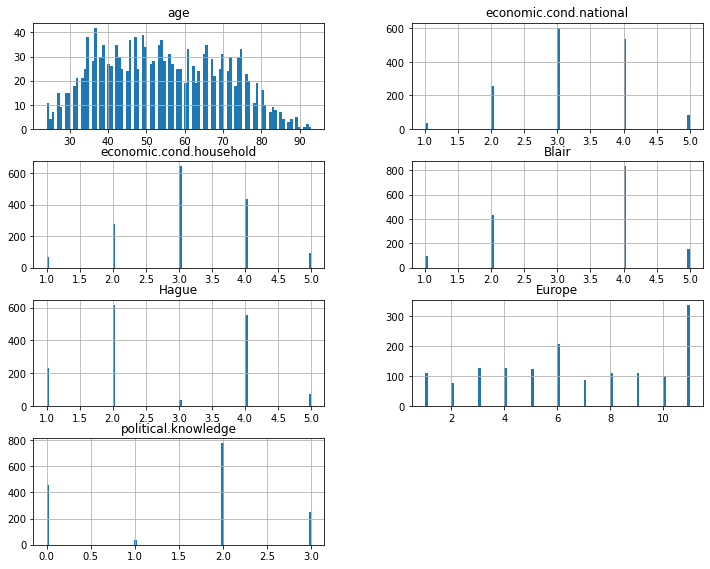

In [21]:
columns = list(pdata)[0:-1] 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(12,2));

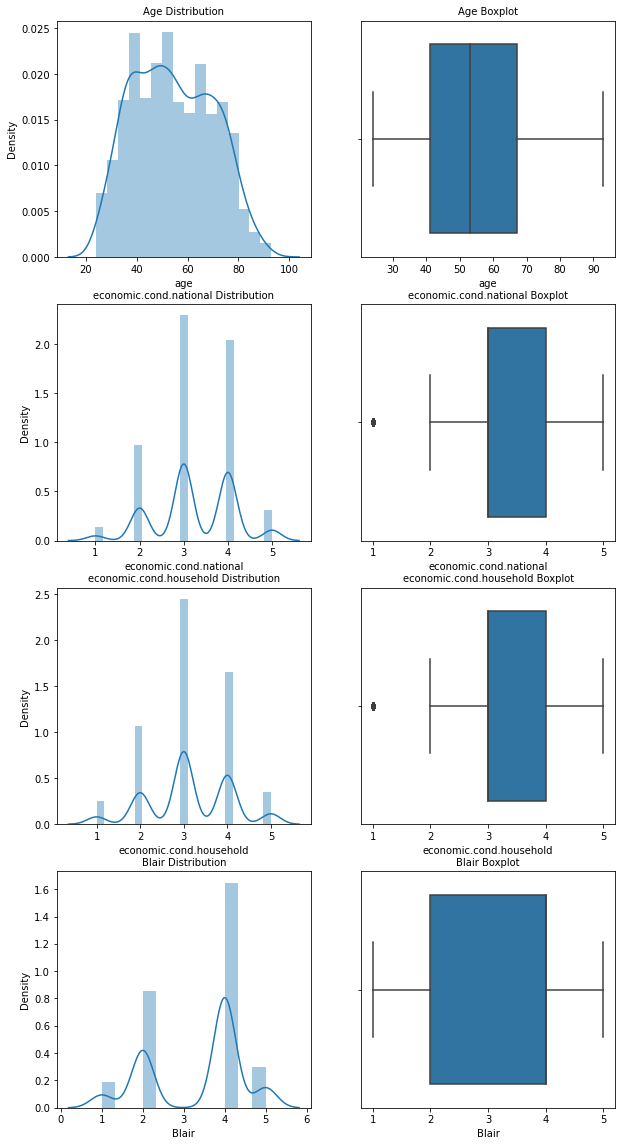

In [22]:
import warnings 
warnings.filterwarnings( "ignore")
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(pdata['age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(pdata['age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10)

a = sns.distplot(pdata['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(pdata['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(pdata['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(pdata['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(pdata['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(pdata['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)


plt.show()

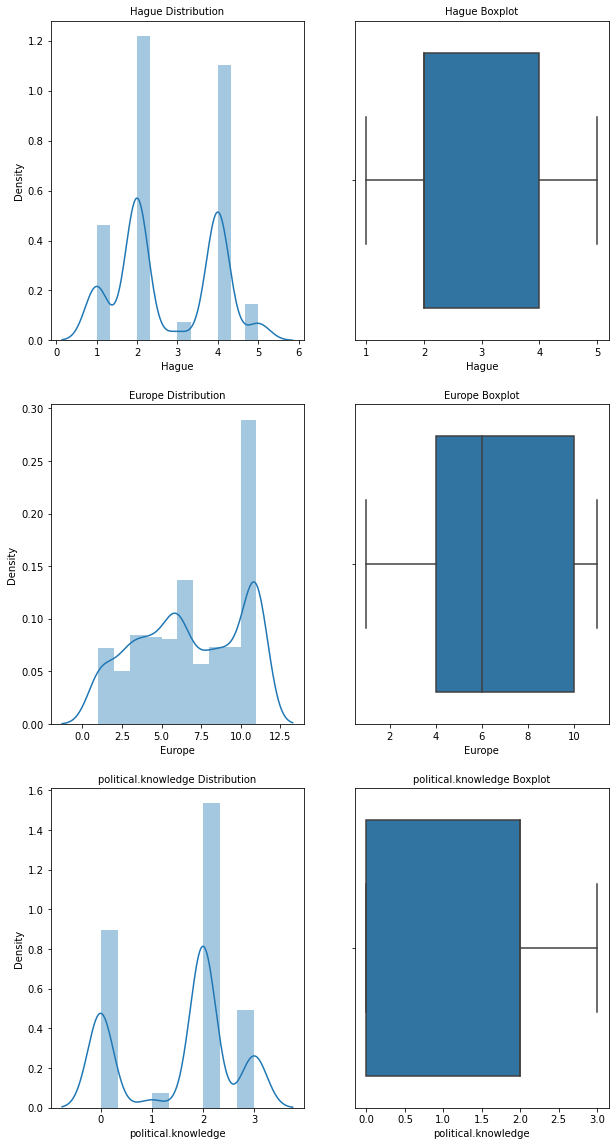

In [23]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(pdata['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(pdata['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(pdata['Europe'] , ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(pdata['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(pdata['political.knowledge'] , ax=axes[2][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(pdata['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()

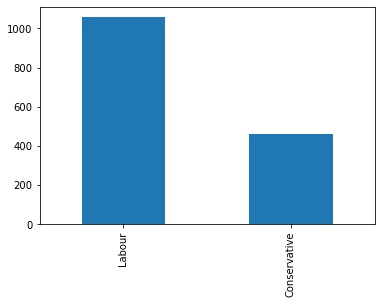

In [24]:
pd.value_counts(pdata["vote"]).plot(kind="bar")
plt.show()

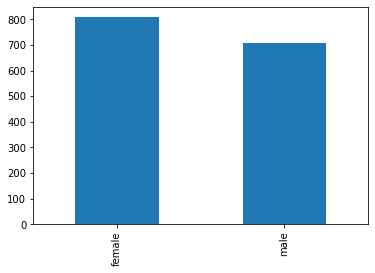

In [25]:
pd.value_counts(pdata["gender"]).plot(kind="bar")
plt.show()

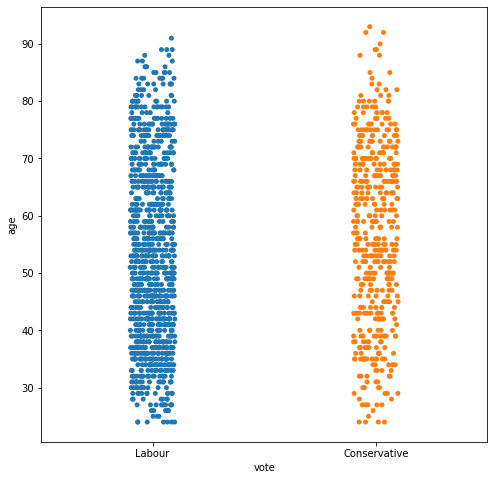

In [26]:
plt.figure(figsize=(8,8))
sns.stripplot(pdata["vote"], pdata['age'], jitter=True) 
plt.show()

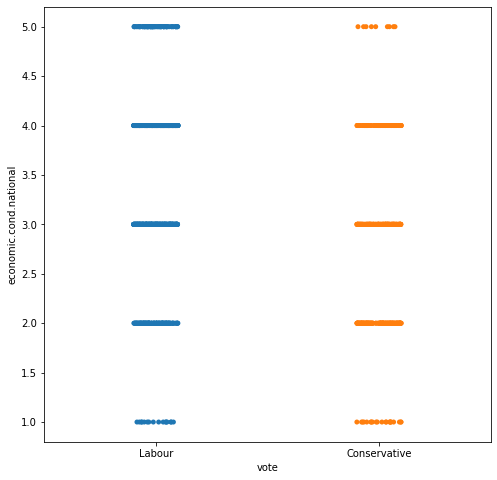

In [27]:
plt.figure(figsize=(8,8))
sns.stripplot(pdata["vote"], pdata['economic.cond.national'], jitter=True) 
plt.show()

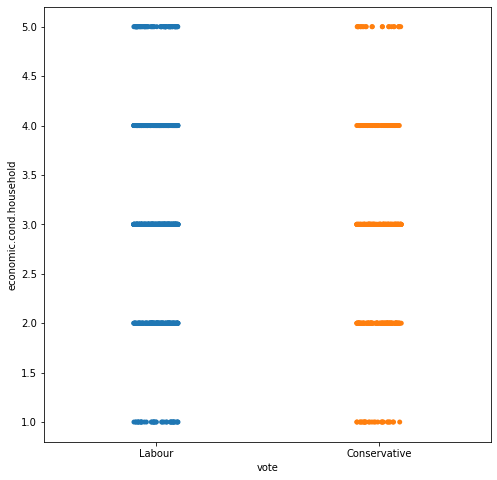

In [28]:
plt.figure(figsize=(8,8))
sns.stripplot(pdata["vote"], pdata['economic.cond.household'], jitter=True) 
plt.show()

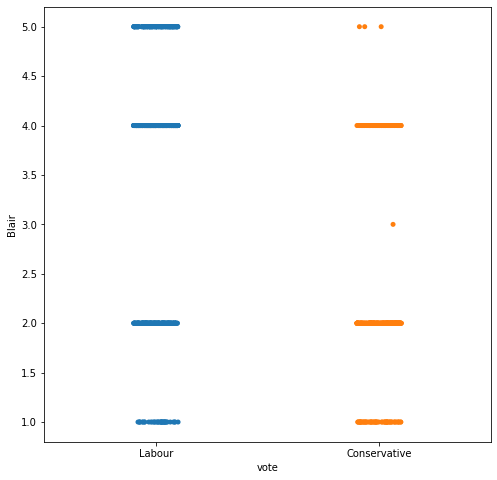

In [29]:
plt.figure(figsize=(8,8))
sns.stripplot(pdata["vote"], pdata['Blair'], jitter=True) 
plt.show()

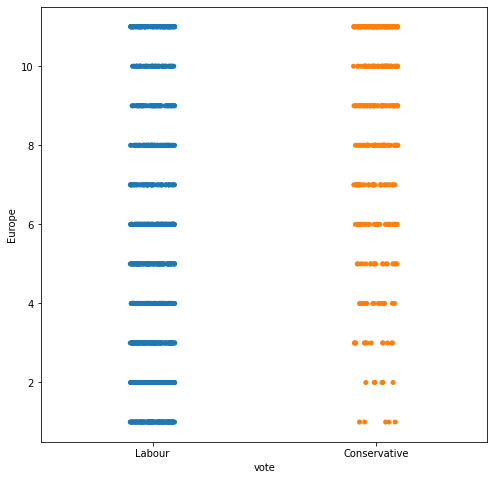

In [30]:
plt.figure(figsize=(8,8))
sns.stripplot(pdata["vote"], pdata['Europe'], jitter=True) 
plt.show()

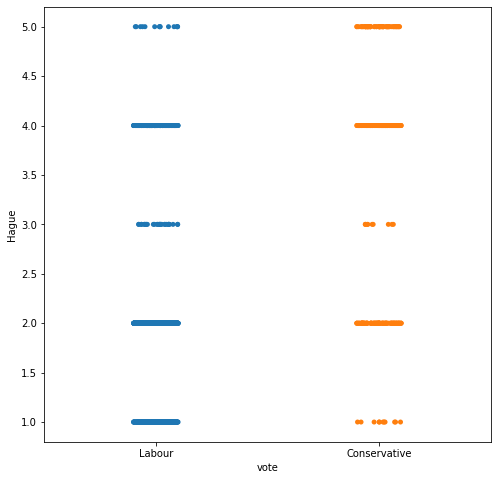

In [31]:
plt.figure(figsize=(8,8))
sns.stripplot(pdata["vote"], pdata['Hague'], jitter=True) 
plt.show()

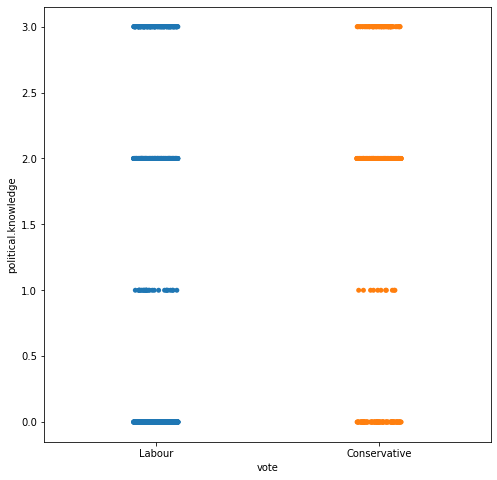

In [32]:
plt.figure(figsize=(8,8))
sns.stripplot(pdata["vote"], pdata['political.knowledge'], jitter=True) 
plt.show()

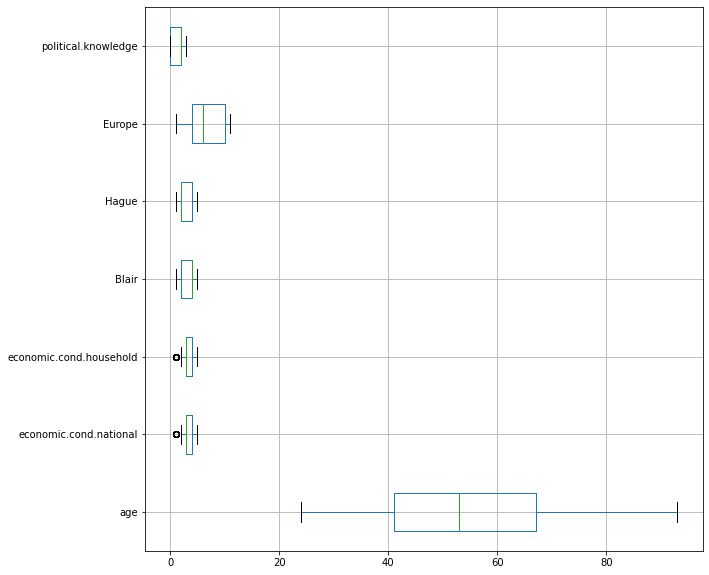

In [33]:
plt.figure(figsize=(10,10))
pdata[num].boxplot(vert=0)
plt.show()

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [35]:
lr,ur=remove_outlier(pdata["economic.cond.household"])
pdata["economic.cond.household"]=np.where(pdata["economic.cond.household"]>ur,ur,pdata["economic.cond.household"])
pdata["economic.cond.household"]=np.where(pdata["economic.cond.household"]<lr,lr,pdata["economic.cond.household"])

In [36]:
lr,ur=remove_outlier(pdata["economic.cond.national"])
pdata["economic.cond.national"]=np.where(pdata["economic.cond.national"]>ur,ur,pdata["economic.cond.national"])
pdata["economic.cond.national"]=np.where(pdata["economic.cond.national"]<lr,lr,pdata["economic.cond.national"])

<AxesSubplot:>

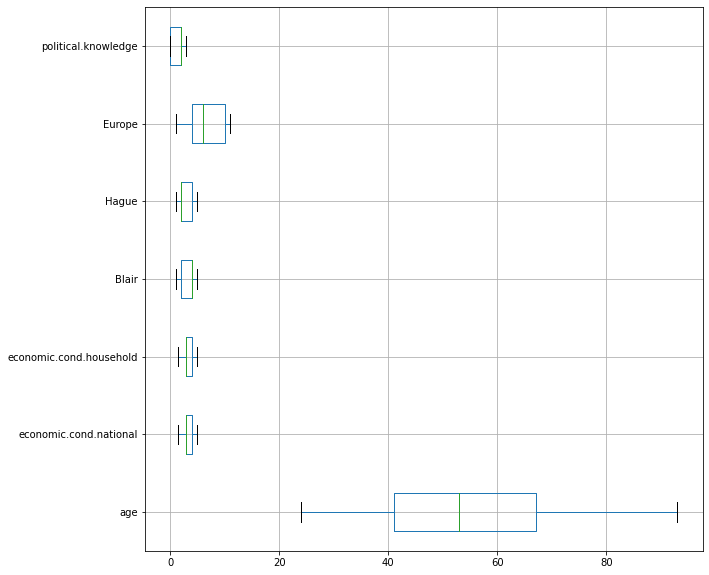

In [37]:
plt.figure(figsize=(10,10))
pdata[num].boxplot(vert=0)

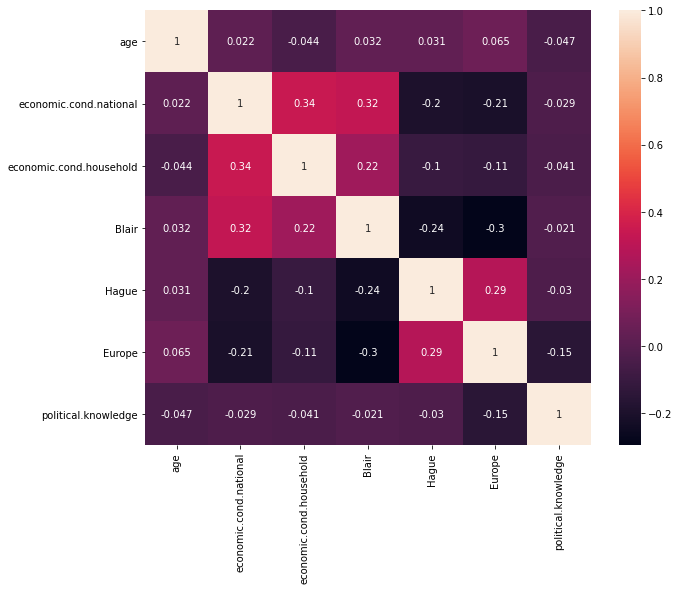

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(pdata.corr(),annot=True)
plt.show()

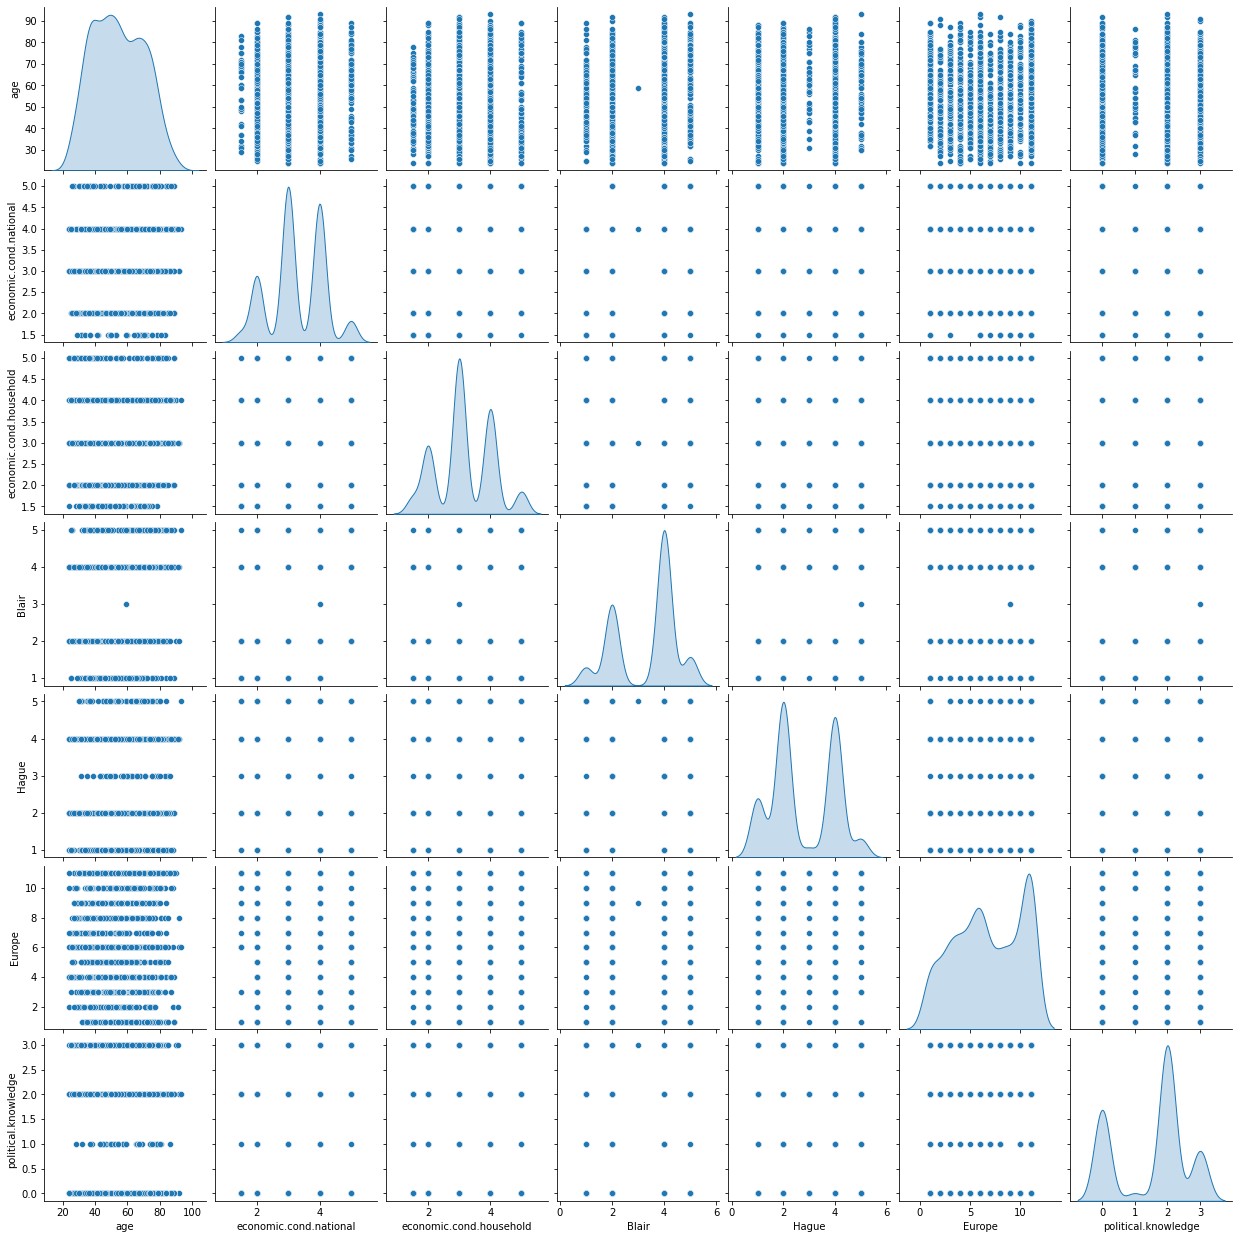

In [39]:
sns.pairplot(pdata,diag_kind='kde')

In [40]:
cat

['vote', 'gender']

In [41]:
data =pd.get_dummies(pdata, columns=cat,drop_first=True)

In [42]:
data.shape

(1517, 9)

In [43]:
data.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


In [44]:
X = data.drop("vote_Labour",axis=1) 
y = data["vote_Labour"] 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [46]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
991,34,2.0,4.0,1,4,11,2,0
1274,40,4.0,3.0,4,4,6,0,1
649,61,4.0,3.0,4,4,7,2,0
677,47,3.0,3.0,4,2,11,0,1
538,44,5.0,3.0,4,2,8,0,1


In [47]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [48]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)
train_score=model.score(X_train,y_train)
print(train_score)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

0.8388312912346843
          0         1         2         3         4         5         6  \
0 -0.012814  0.702751  0.115294  0.615667 -0.803342 -0.203851 -0.300479   

          7  intercept  
0  0.206977   1.345731  


In [49]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8289473684210527


<AxesSubplot:>

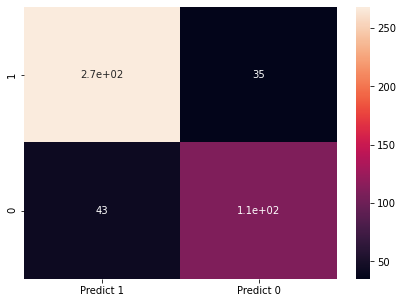

In [50]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [52]:
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [53]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



the auc 0.890 


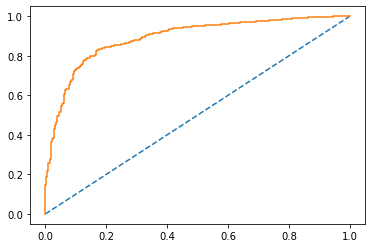

In [54]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

the auc curve 0.888 


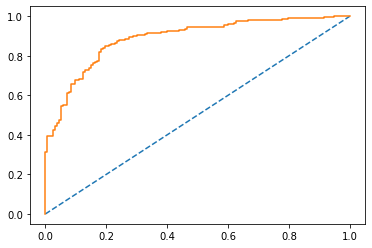

In [55]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

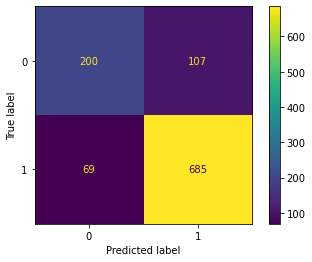

In [56]:
plot_confusion_matrix(LDA_model,X_train,y_train);

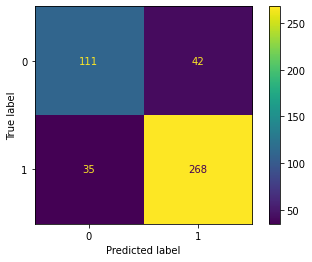

In [57]:
plot_confusion_matrix(LDA_model,X_test,y_test);

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[204 103]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [61]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105
[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



In [62]:
0.8539114043355325-0.8157894736842105

0.03812193065132197

In [63]:
from sklearn.naive_bayes import GaussianNB


diab_model = GaussianNB()

diab_model.fit(X_train, y_train.ravel())

GaussianNB()

In [64]:
diab_train_predict = diab_model.predict(X_train)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.8341



In [65]:
diab_test_predict = diab_model.predict(X_test)


print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.8224



Confusion Matrix


<AxesSubplot:>

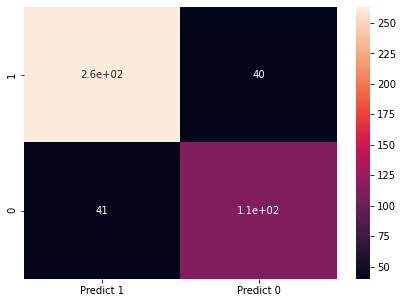

In [66]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [67]:
print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.87      0.87       303
           0       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [68]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [69]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [70]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



the auc 0.889 


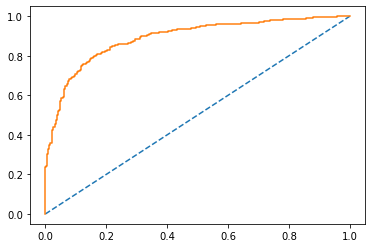

In [71]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

the auc curve 0.876 


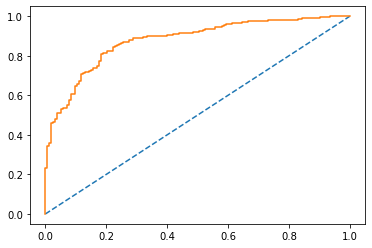

In [72]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

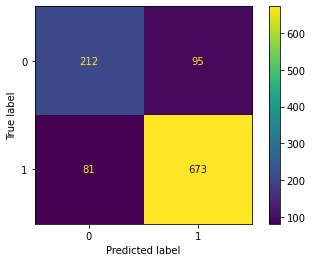

In [73]:
plot_confusion_matrix(NB_model,X_train,y_train);

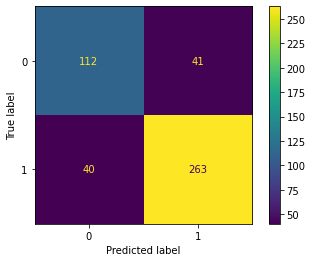

In [74]:
plot_confusion_matrix(NB_model,X_test,y_test);

In [75]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [76]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [77]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8135964912280702

In [78]:
NNH.score(X_train, y_train)

1.0

In [79]:
1-0.8135964912280702

0.1864035087719298

In [80]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [81]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8482563619227145
[[202 105]
 [ 56 698]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.79      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [82]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[ 99  54]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [83]:
0.8482563619227145-0.8245614035087719

0.023694958413942535

the auc 0.918 


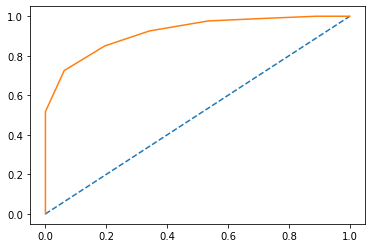

In [84]:
from sklearn.metrics import roc_auc_score,roc_curve
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

the auc curve 0.861 


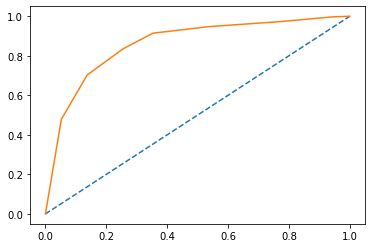

In [85]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

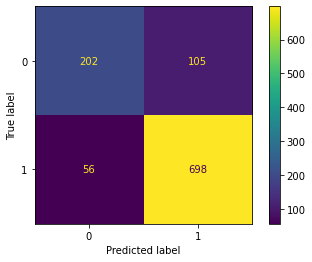

In [86]:
plot_confusion_matrix(KNN_model,X_train,y_train);

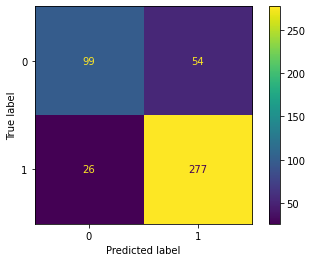

In [87]:
plot_confusion_matrix(KNN_model,X_test,y_test);

In [88]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2192982456140351,
 0.21052631578947367,
 0.1842105263157895,
 0.17543859649122806,
 0.19298245614035092,
 0.19517543859649122,
 0.19736842105263153,
 0.19298245614035092,
 0.20175438596491224,
 0.19517543859649122]

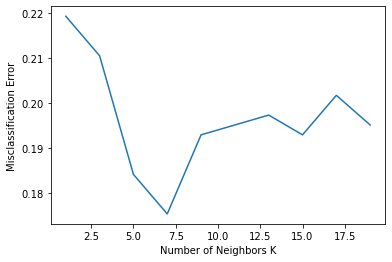

In [89]:
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

the auc curve 0.889 


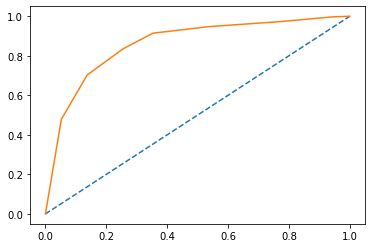

In [90]:
probs_train=knn.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

the auc curve 0.873 


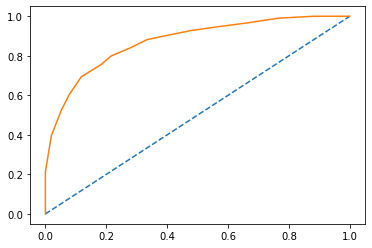

In [91]:
probs_test=knn.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

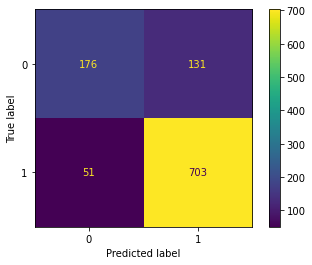

In [92]:
plot_confusion_matrix(knn,X_train,y_train);

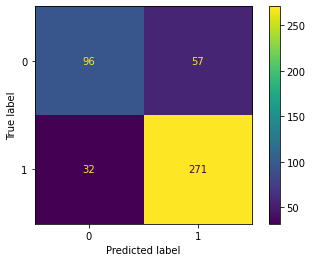

In [93]:
plot_confusion_matrix(knn,X_test,y_test);

In [94]:
KNN_model=KNeighborsClassifier(n_neighbors=9)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [95]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8491988689915174
[[200 107]
 [ 53 701]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.79      0.81      1061
weighted avg       0.85      0.85      0.84      1061



In [96]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8070175438596491
[[ 96  57]
 [ 31 272]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       153
           1       0.83      0.90      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.80      0.81      0.80       456



In [97]:
0.8491988689915174-0.8070175438596491

0.04218132513186834

In [98]:
KNN_model=KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [99]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8454288407163054
[[195 112]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.70       307
           1       0.86      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.78      0.80      1061
weighted avg       0.84      0.85      0.84      1061



In [100]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8048245614035088
[[ 91  62]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       153
           1       0.82      0.91      0.86       303

    accuracy                           0.80       456
   macro avg       0.79      0.75      0.77       456
weighted avg       0.80      0.80      0.80       456



In [101]:
0.8454288407163054-0.8048245614035088

0.04060427931279664

In [102]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [103]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [104]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [105]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [106]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [107]:
best_model = grid_search.best_estimator_

In [108]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [109]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.425912,0.574088
1,0.153027,0.846973
2,0.006707,0.993293
3,0.839478,0.160522
4,0.065083,0.934917


              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



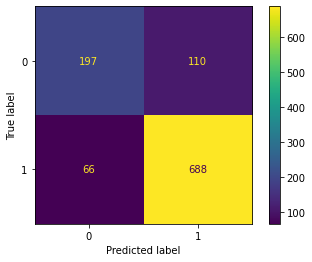

In [110]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



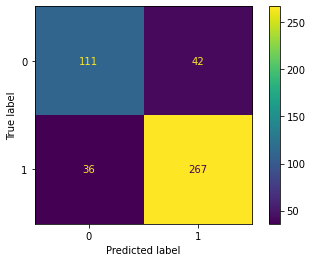

In [111]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.890


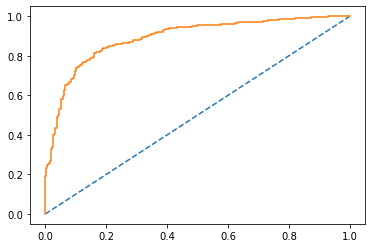

In [112]:
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.883


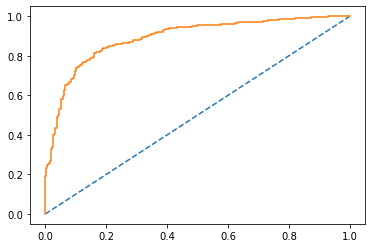

In [113]:
probs_test = best_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

In [114]:
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 9)
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.7894736842105263
Accuracy Score for K=5 is  0.8157894736842105
Accuracy Score for K=9 is  0.8070175438596491


In [115]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2192982456140351,
 0.21052631578947367,
 0.1842105263157895,
 0.17543859649122806,
 0.19298245614035092,
 0.19517543859649122,
 0.19736842105263153,
 0.19298245614035092,
 0.20175438596491224,
 0.19517543859649122]

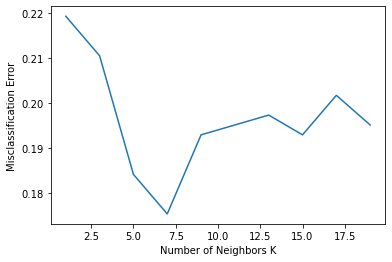

In [116]:
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [117]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [118]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.7960526315789473


In [119]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8086710650329878
0.7894736842105263


In [120]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
age                      0.000000
economic.cond.national   0.000000
economic.cond.household  0.016012
Blair                    0.291569
Hague                    0.514417
Europe                   0.139003
political.knowledge      0.038999
gender_male              0.000000


0.7894736842105263


<AxesSubplot:>

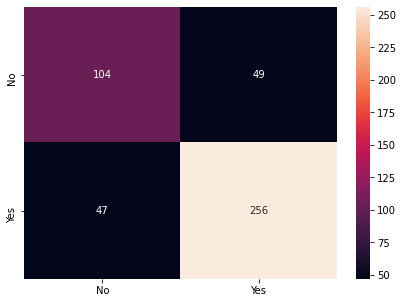

In [121]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [122]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8399122807017544


<AxesSubplot:>

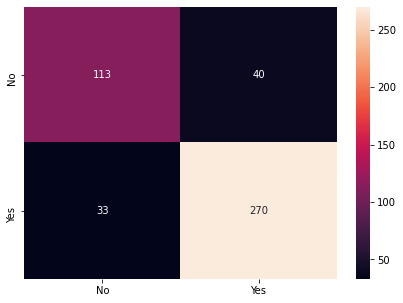

In [123]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [124]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=100,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8463713477851084
0.8135964912280702


<AxesSubplot:>

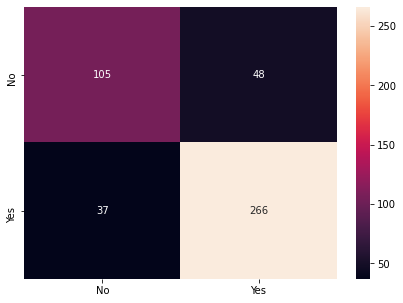

In [125]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_train , y_train))
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8289473684210527


<AxesSubplot:>

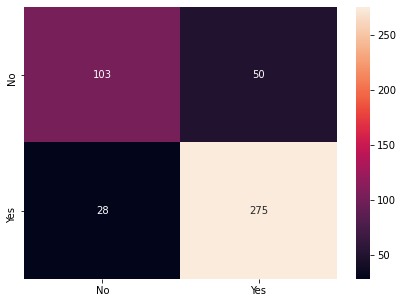

In [127]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [128]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(X_train, y_train)

0.8245614035087719


<AxesSubplot:>

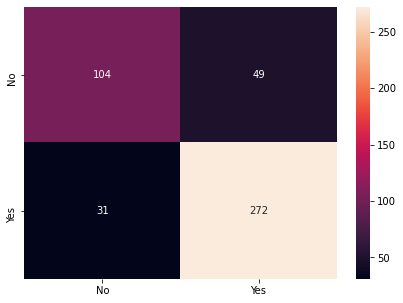

In [129]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [130]:
ADB_model = AdaBoostClassifier(n_estimators=10,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=1)

In [131]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8426013195098964
[[206 101]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [132]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[110  43]
 [ 39 264]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.898


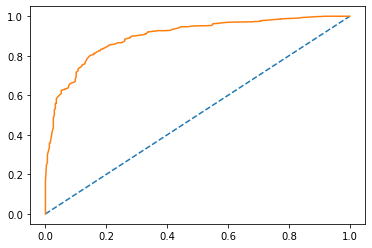

In [133]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

AUC: 0.878


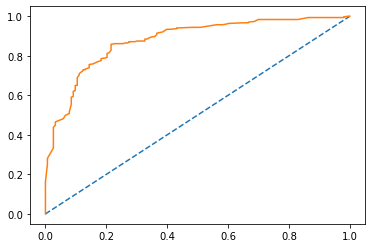

In [134]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

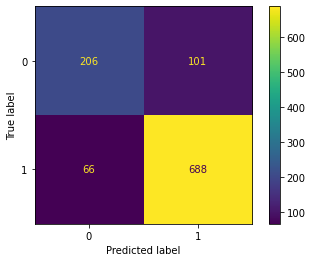

In [135]:
plot_confusion_matrix(ADB_model,X_train,y_train);

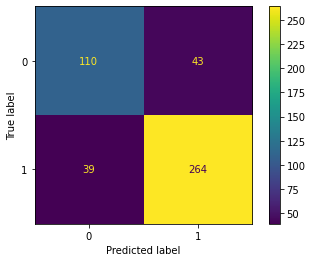

In [136]:
plot_confusion_matrix(ADB_model,X_test,y_test);

In [137]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [138]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [139]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.951


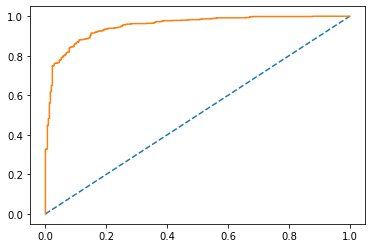

In [140]:
probs = gbcl.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

AUC: 0.899


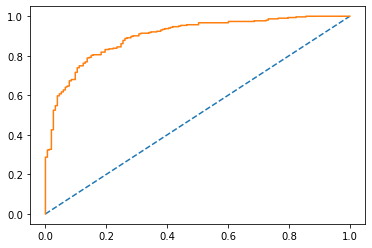

In [141]:
probs_test = gbcl.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

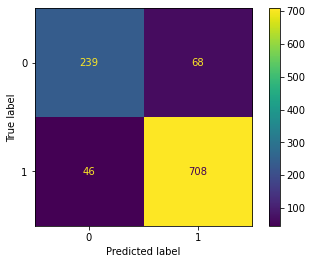

In [142]:
plot_confusion_matrix(gbcl,X_train,y_train);

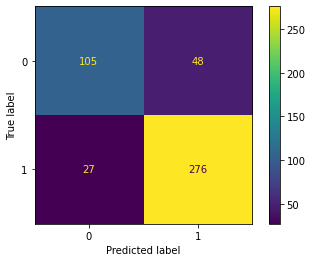

In [143]:
plot_confusion_matrix(gbcl,X_test,y_test);

In [144]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [145]:
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [146]:
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.793859649122807
[[103  50]
 [ 44 259]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       153
           1       0.84      0.85      0.85       303

    accuracy                           0.79       456
   macro avg       0.77      0.76      0.77       456
weighted avg       0.79      0.79      0.79       456



In [147]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [148]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [149]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [150]:
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [151]:
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9641847313854854
[[276  31]
 [  7 747]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.96      1061
   macro avg       0.97      0.94      0.96      1061
weighted avg       0.96      0.96      0.96      1061



In [152]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[103  50]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.997


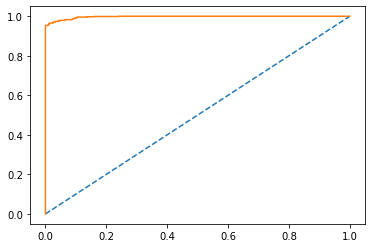

In [153]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

AUC: 0.895


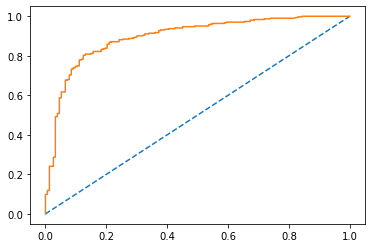

In [154]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

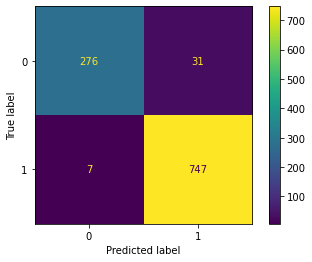

In [155]:
plot_confusion_matrix(Bagging_model,X_train,y_train);

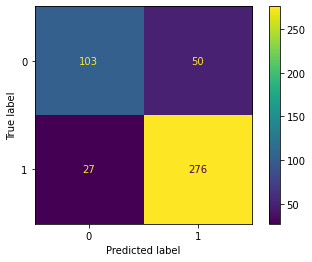

In [156]:
plot_confusion_matrix(Bagging_model,X_test,y_test);

In [157]:
from sklearn.datasets import load_iris

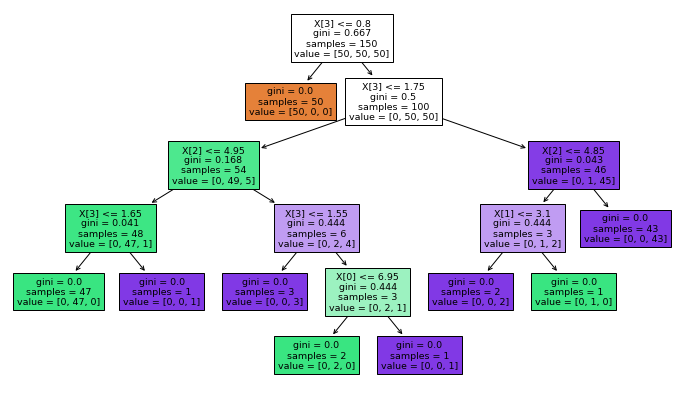

In [158]:
clf = tree.DecisionTreeClassifier()
iris=load_iris()
plt.figure(figsize=(12,7))
tree.plot_tree(clf.fit(iris.data, iris.target),filled=True) 
plt.show()

In [159]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [160]:
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7807017543859649
[[ 99  54]
 [ 46 257]]


In [161]:
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(X_train,y_train)

y_pred=clfRF.predict(X_test)
model_scoreRF = clfRF.score(X_test, y_test)

In [162]:
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_pred))

0.8157894736842105
[[102  51]
 [ 33 270]]


In [163]:
bgcl = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [164]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8245614035087719
[[112  41]
 [ 39 264]]


In [165]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [166]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_train,y_train))
print(gbcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8803016022620169
0.8289473684210527
[[103  50]
 [ 28 275]]


In [167]:
from sklearn.model_selection import cross_val_score
clfCVRF = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clfCVRF, X_train, y_train, cv=10)
np.mean(scores)

0.8246870040557222

In [168]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [169]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list 

In [170]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8463713477851084
Accuracy on test set :  0.8135964912280702
Recall on training set :  0.9124668435013262
Recall on test set :  0.8778877887788779
Precision on training set :  0.8764331210191083
Precision on test set :  0.8471337579617835


In [171]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

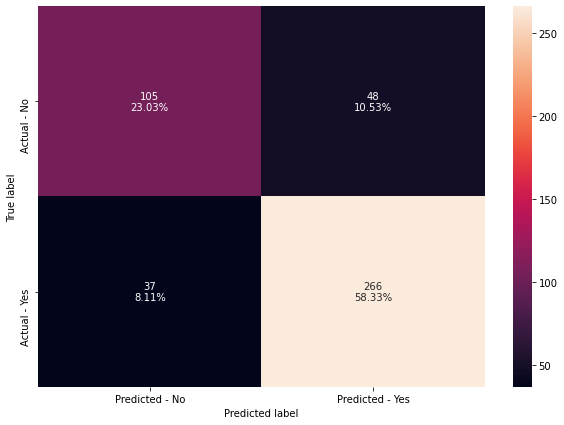

In [172]:
make_confusion_matrix(abc,y_test)

In [173]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [174]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8925541941564562
Accuracy on test set :  0.8355263157894737
Recall on training set :  0.9389920424403183
Recall on test set :  0.9108910891089109
Precision on training set :  0.9123711340206185
Precision on test set :  0.8518518518518519


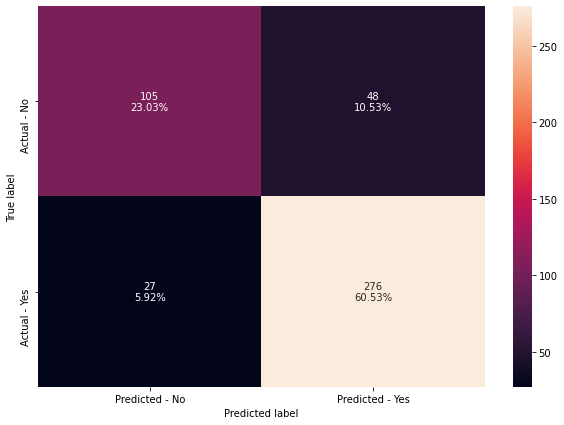

In [175]:
make_confusion_matrix(gbc,y_test)

In [176]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [177]:
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8925541941564562
Accuracy on test set :  0.8377192982456141
Recall on training set :  0.9416445623342176
Recall on test set :  0.9141914191419142
Precision on training set :  0.9102564102564102
Precision on test set :  0.8523076923076923


In [178]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [179]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.8737040527803959
Accuracy on test set :  0.8333333333333334
Recall on training set :  0.9350132625994695
Recall on test set :  0.9075907590759076
Precision on training set :  0.8924050632911392
Precision on test set :  0.8513931888544891


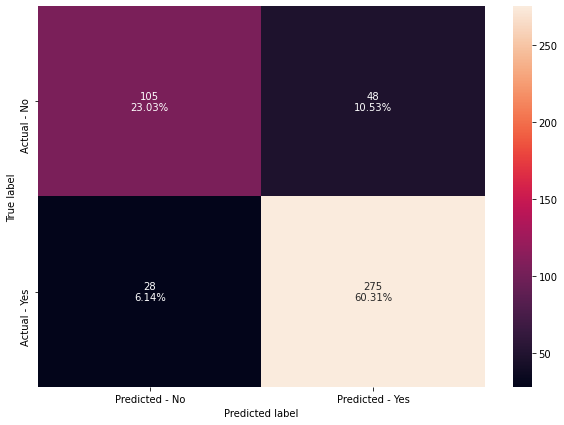

In [180]:
make_confusion_matrix(gbc_tuned,y_test)

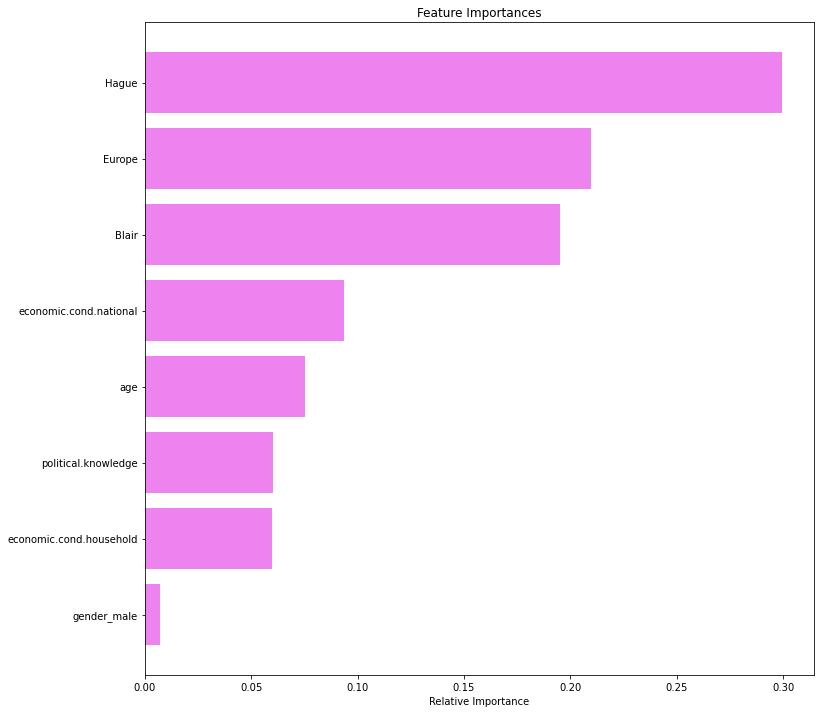

In [181]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [171]:
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [172]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.7945334590009425
Accuracy on test set :  0.7785087719298246
Recall on training set :  0.9575596816976127
Recall on test set :  0.9636963696369637
Precision on training set :  0.7951541850220264
Precision on test set :  0.7643979057591623


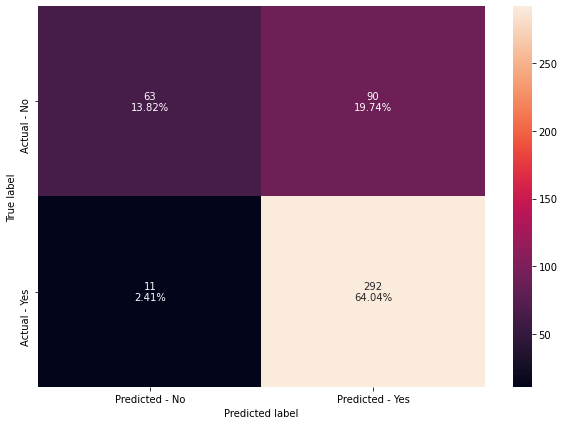

In [173]:
make_confusion_matrix(abc_tuned,y_test)

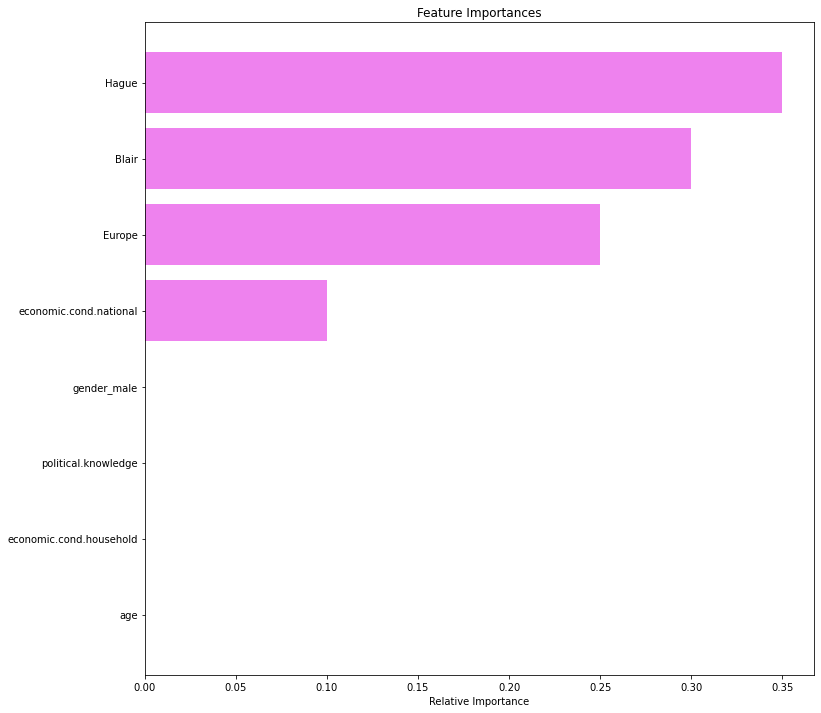

In [174]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [182]:
models = [LDA_model, knn, best_model, ADB_model, gbcl, Bagging_model, NB_model]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [184]:
comparison_frame = pd.DataFrame({'Model':['Linear Discriminant Analysis','K-Nearest Neighbours', 
                                          'Logistic Regression','Ada Boosting',
                                          'Gradient Boosting','Bagging','Naive Bayes'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Linear Discriminant Analysis,0.83,0.83,0.91,0.88,0.86,0.86
1,K-Nearest Neighbours,0.83,0.80,0.93,0.89,0.84,0.83
2,Logistic Regression,0.83,0.83,0.91,0.88,0.86,0.86
3,Ada Boosting,0.84,0.82,0.91,0.87,0.87,0.86
4,Gradient Boosting,0.88,0.83,0.94,0.91,0.90,0.85
5,Bagging,0.96,0.83,0.99,0.91,0.96,0.85
6,Naive Bayes,0.83,0.82,0.89,0.87,0.88,0.87


In [185]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Mrinal\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [186]:
x=inaugural.raw('1941-Roosevelt.txt')

In [187]:
print("Number of characters in roosevelt's speech:",len(x))

Number of characters in roosevelt's speech: 7571


In [188]:
char_count1=inaugural.words('1941-Roosevelt.txt')

In [189]:
print("Number of words in roosevelt's speech:",len(char_count1))

Number of words in roosevelt's speech: 1536


In [190]:
sent1=inaugural.sents('1941-Roosevelt.txt')

In [191]:
print("Number of sentences in roosevelt's speech:",len(sent1))

Number of sentences in roosevelt's speech: 68


In [192]:
y=inaugural.raw('1961-Kennedy.txt')

In [193]:
print("Number of characters in kennedy's speech:",len(y))

Number of characters in kennedy's speech: 7618


In [194]:
char_count2=inaugural.words('1961-Kennedy.txt')

In [195]:
print("Number of words in kennedy's speech:",len(char_count2))

Number of words in kennedy's speech: 1546


In [196]:
sent2=inaugural.sents('1961-Kennedy.txt')

In [197]:
print("Number of sentences in kennedy's speech:",len(sent2))

Number of sentences in kennedy's speech: 52


In [198]:
z=inaugural.raw('1973-Nixon.txt')

In [199]:
print("Number of characters in nixon's speech:",len(z))

Number of characters in nixon's speech: 9991


In [200]:
char_count3=inaugural.words('1973-Nixon.txt')

In [201]:
print("Number of words in nixon's speech:",len(char_count3))

Number of words in nixon's speech: 2028


In [202]:
sent3=inaugural.sents('1973-Nixon.txt')

In [203]:
print("Number of sentences in nixon's speech:",len(sent3))

Number of sentences in nixon's speech: 69


In [204]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mrinal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [205]:
import string
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) 
# Converting all the words to lower casse
all_words1 = (x.lower() for x in inaugural.words('1941-Roosevelt.txt'))# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean1 = [word for word in all_words1 if word not in stopwords and word!='--']
# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq1 = nltk.FreqDist(all_words_clean1)
# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features1 = [item[0] for item in all_words_freq1.most_common(2000)]

In [206]:
word_features1[0:3]

['nation', 'know', 'spirit']

In [207]:
all_words_freq1.most_common(10)

[('nation', 12),
 ('know', 10),
 ('spirit', 9),
 ('life', 9),
 ('democracy', 9),
 ('us', 8),
 ('people', 7),
 ('america', 7),
 ('years', 6),
 ('freedom', 6)]

In [208]:
print('Word count before removal of stopwords from 1st speech:',len(char_count1))

Word count before removal of stopwords from 1st speech: 1536


In [209]:
print('Word count after removal of stopwords from 1st speech:',len(all_words_clean1))

Word count after removal of stopwords from 1st speech: 632


In [210]:
from nltk.tokenize import word_tokenize

In [211]:
word_tokens = word_tokenize(inaugural.raw('1941-Roosevelt.txt'))

filtered_sentence = [w for w in word_tokens if w not in stopwords and w!='--']

filtered_sentence = []

for w in word_tokens:
    if w not in stopwords and w!='--':
        filtered_sentence.append(w)
print(filtered_sentence[:20])

['On', 'national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld']


In [212]:
all_words2 = (x.lower() for x in inaugural.words('1961-Kennedy.txt'))# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean2 = [word for word in all_words2 if word not in stopwords and word!='--']

# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq2 = nltk.FreqDist(all_words_clean2)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features2 = [item[0] for item in all_words_freq2.most_common(2000)]

In [213]:
word_features2[0:3]

['let', 'us', 'world']

In [214]:
all_words_freq2.most_common(10)

[('let', 16),
 ('us', 12),
 ('world', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('power', 5),
 ('shall', 5),
 ('free', 5)]

In [215]:
print('Word count before removal of stopwords from 2nd speech:',len(char_count2))

Word count before removal of stopwords from 2nd speech: 1546


In [216]:
print('Word count after removal of stopwords from 2nd speech:',len(all_words_clean2))

Word count after removal of stopwords from 2nd speech: 697


In [217]:
word_tokens = word_tokenize(inaugural.raw('1961-Kennedy.txt'))

filtered_sentence = [w for w in word_tokens if w not in stopwords and w!='--']

filtered_sentence = []

for w in word_tokens:
    if w not in stopwords and w!='--':
        filtered_sentence.append(w)
print(filtered_sentence[:20])

['Vice', 'President', 'Johnson', 'Mr.', 'Speaker', 'Mr.', 'Chief', 'Justice', 'President', 'Eisenhower', 'Vice', 'President', 'Nixon', 'President', 'Truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe']


In [218]:
all_words3 = (x.lower() for x in inaugural.words('1973-Nixon.txt'))# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean3 = [word for word in all_words3 if word not in stopwords and word!='--']


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq3 = nltk.FreqDist(all_words_clean3)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features3 = [item[0] for item in all_words_freq3.most_common(2000)]

In [219]:
word_features3[0:3]

['us', 'let', 'america']

In [220]:
all_words_freq3.most_common(10)

[('us', 26),
 ('let', 22),
 ('america', 21),
 ('peace', 19),
 ('world', 18),
 ('new', 15),
 ('nation', 11),
 ('responsibility', 11),
 ('government', 10),
 ('great', 9)]

In [221]:
print('Word count before removal of stopwords from 3rd speech:',len(char_count3))

Word count before removal of stopwords from 3rd speech: 2028


In [222]:
print('Word count after removal of stopwords from 3rd speech:',len(all_words_clean3))

Word count after removal of stopwords from 3rd speech: 836


In [223]:
word_tokens = word_tokenize(inaugural.raw('1973-Nixon.txt'))

filtered_sentence = [w for w in word_tokens if w not in stopwords and w!='--']

filtered_sentence = []

for w in word_tokens:
    if w not in stopwords and w!='--':
        filtered_sentence.append(w)
print(filtered_sentence[:20])

['Mr.', 'Vice', 'President', 'Mr.', 'Speaker', 'Mr.', 'Chief', 'Justice', 'Senator', 'Cook', 'Mrs.', 'Eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'When']


In [224]:
from wordcloud import WordCloud,STOPWORDS

In [225]:
wc_a = ' '.join(all_words_clean1)

Word Cloud for Roosevelt's speech (after cleaning)!!


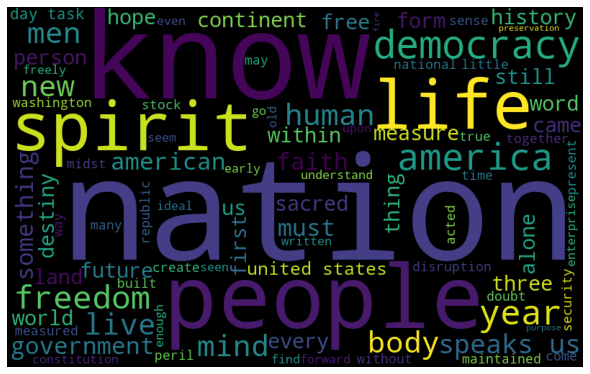

In [226]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='black', 
                min_font_size = 10, random_state=21).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt's speech (after cleaning)!!")
plt.show()

In [227]:
wc_b = ' '.join(all_words_clean2)

Word Cloud for Kennedy's speech (after cleaning)!!


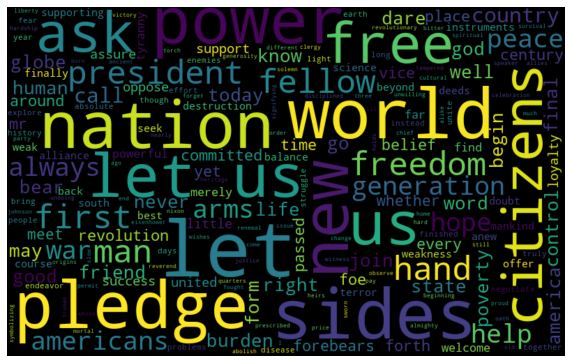

In [228]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(wc_b)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
print("Word Cloud for Kennedy's speech (after cleaning)!!")
plt.show()

In [229]:
wc_c = ' '.join(all_words_clean3)

In [230]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=800,
                      height=500
                     ).generate(wc_c)

Word Cloud for Nixon's speech (after cleaning)!!


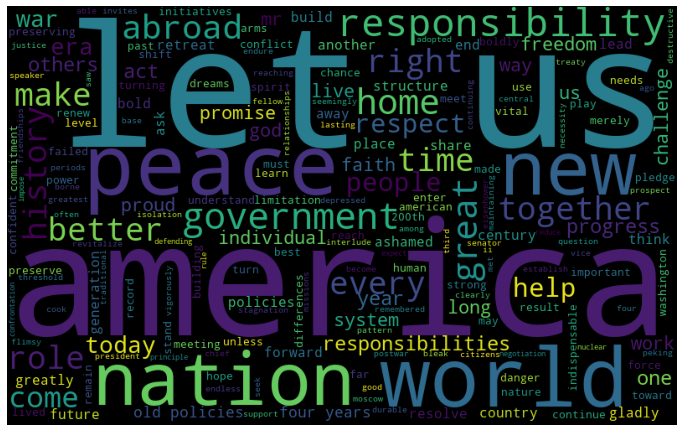

In [231]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
print("Word Cloud for Nixon's speech (after cleaning)!!")
plt.show()